In [1]:


import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from datetime import datetime
import os
from thermal_lib import *
from tqdm import tqdm

def plot_avg(var, isDay, draw_sub=True, draw_sem = True, draw_zero = False, ax=None, color='b'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))

    if draw_zero:
        ax.axhline(0,color='k',linestyle='--')

    if draw_sub:
        for c in var.columns:
            ax.plot(var.index, var[c],color,alpha=.1)

    avg = var.mean(axis=1) 

    if draw_sem:
        sem = var.sem(axis=1) 
        ax.fill_between(var.index, avg+sem, avg-sem, alpha=.3, color=color,edgecolor='none')

    ax.plot(var.index, avg,color,alpha=1)
    xlims = [var.index[0], var.index[-1]]
    ax.set_xlim(xlims)
    ylims = ax.get_ylim()
    ax.fill_between(var.index, y1=ylims[0], y2=ylims[1], where=isDay<1,alpha=.2, color='gray',edgecolor='none')
    ax.set_ylim(ylims)
    #ax.set_xlabel('Time [Hours]')
    
def plot_raw(data=None, y=None, x=None, isDay=None, ax=None, hzero=True):
    
    if ax is None:
        fig,ax = plt.subplots(figsize=(8,3))

    if x is None:
        x = data.index
    
    if hzero:
        ax.axhline(0,color='k',linestyle='--')
    
    ax.plot(x, data[y] )
    ax.set_ylim([data[y].min()*1.1, data[y].max()*1.1 ])
    ylims = ax.get_ylim()
    ax.fill_between(x, where=data['isDay']==0, 
                    y1=ylims[0], 
                    y2=ylims[1], 
                    color='gray', alpha=.2, edgecolor='None' )

    ax.set_xlim([x[0], x[-1]])
    return ax

    
%matplotlib notebook

In [2]:

pth = r'D:\thermography\cdkl5_thermal_behaviour_group1\unico'
#pth = None
sub = Subjects(pth)
print(sub)

Number of Subjects: 16

0 -> ID: KO_69 RECs: 3
1 -> ID: WT_71 RECs: 3
2 -> ID: KO_70 RECs: 3
3 -> ID: WT_74 RECs: 3
4 -> ID: WT_79 RECs: 3
5 -> ID: KO_72 RECs: 3
6 -> ID: WT_81 RECs: 3
7 -> ID: KO_75 RECs: 3
8 -> ID: KO_77 RECs: 3
9 -> ID: WT_83 RECs: 3
10 -> ID: KO_1021 RECs: 3
11 -> ID: WT_86 RECs: 3
12 -> ID: WT_91 RECs: 3
13 -> ID: KO_87 RECs: 3
14 -> ID: WT_97 RECs: 3
15 -> ID: KO_99 RECs: 3



In [110]:
data_min = sub.get_data(4)
data_single_day = sub.get_single_day(4,6)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from numpy.random import default_rng

# Assuming you have a temperature signal stored in an array called "temperature_signal"
# sampled 60 times per hour and recorded for 7 days

# Set the number of Monte Carlo iterations
n_iterations = 1000
temperature_signal = data_min['RT_norm']
# Calculate the original PSD
frequencies, original_power_spectrum = periodogram(temperature_signal, fs=60)

# Create a random number generator
rng = default_rng()

# Perform the Monte Carlo simulation
resampled_spectrum = np.zeros((n_iterations,len(original_power_spectrum)))
for i in range(n_iterations):
    surrogate_signal = rng.permutation(temperature_signal)
    _, surrogate_power_spectrum = periodogram(surrogate_signal, fs=60)
    resampled_spectrum[i,:] = surrogate_power_spectrum




In [134]:
rt_signal = data_min['RT_norm']
frequencies, rt_power_spectrum = periodogram(rt_signal, fs=60)
animal_signal = data_min['temp_norm']
frequencies, animal_power_spectrum = periodogram(animal_signal, fs=60)
animal_c_signal = data_min['temp_rt_corrected'] 
frequencies, animal_c_power_spectrum = periodogram(animal_c_signal, fs=60)

<IPython.core.display.Javascript object>


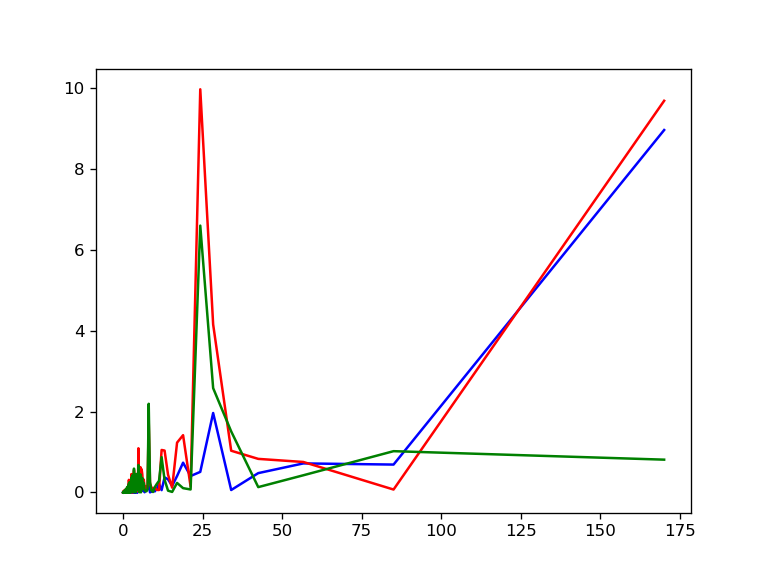

C:\Users\pupil\AppData\Local\Temp\ipykernel_5752\453266014.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot( 1/frequencies, rt_power_spectrum,'b')
C:\Users\pupil\AppData\Local\Temp\ipykernel_5752\453266014.py:5: RuntimeWarning: divide by zero encountered in divide
  ax.plot( 1/frequencies, animal_power_spectrum,'r')
C:\Users\pupil\AppData\Local\Temp\ipykernel_5752\453266014.py:6: RuntimeWarning: divide by zero encountered in divide
  ax.plot( 1/frequencies, animal_c_power_spectrum,'g')


In [135]:
fig,ax = plt.subplots()

thresh  = np.mean(resampled_spectrum,axis=0)
ax.plot( 1/frequencies, rt_power_spectrum,'b')
ax.plot( 1/frequencies, animal_power_spectrum,'r')
ax.plot( 1/frequencies, animal_c_power_spectrum,'g')
